In [855]:
collab = False

In [856]:
if collab:
    !pip3 install tensorflow pandas numpy matplotlib yahoo_fin sklearn fredapi openpyxl

In [857]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from yahoo_fin import stock_info as si
from collections import deque

import os
import numpy as np
import pandas as pd
import random
from fredapi import Fred

from distutils.dir_util import copy_tree
import shutil

In [858]:
def create_folders(folders):
    for dir in folders:
        if not os.path.isdir(dir):
            os.mkdir(dir)

def delete_folders(folders):
    for dir in folders:
        if os.path.exists(dir):          
            shutil.rmtree(dir, ignore_errors=True)
            
# delete_folders(["2000_test2021_ema100"])

In [859]:
series_ids = [
    'CHNCPIALLMINMEI','USACPIALLMINMEI','BRACPIALLMINMEI','INDCPIALLMINMEI','BRAPROINDMISMEI'
    ,'USAPROINDMISMEI','PCUOMFGOMFG','RUSCPIALLMINMEI','PIEATI02RUM661N','RUSPROMANMISMEI'
    ,'UNRATENSA','GS10','M2NS','INTDSRUSM193N','TOTALNSA','MABMM301USM189S','ALTSALES','RSXFSN'
    ,'HTRUCKSSA','M2REAL','M1NS','BUSLOANS','MCOILWTICO','DAUPNSA','FRGSHPUSM649NCIS','PCU33443344'
    ,'AISRSA' ,'M1REAL','TRUCKD11','RAILFRTCARLOADS','MNFCTRIRNSA','DAUTOSAAR'
    ,'LTOTALNSA','MVMTD027MNFRBDAL','USEPUINDXM','CEU4348400001','CEU1021100001'
    ,'IPG3361T3S','TRESEGUSM052N','LAUTONSA','WPU114','RSGASSN','CMRMT','NATURALGAS'
    ,'EMVOVERALLEMV','PCU483111483111','WPU101706','GASREGCOVM','WPU11','PCU48214821'
    ,'WPU1413','MRTSIR441USN','U36SNO','PCU21112111','IPB53122N','IPB54100N','EXUSEU'
    ,'PCU4841214841212','GASDESM','EXCHUS','IPN213111N','PCU21212121','WPU012'
    # ,'M1109BUSM293NNBR','PCU484484','IC131','JTU2300JOL','WPU801104','WPU3011','PCU33613361'
]
new_ticker = ['DX-Y.NYB']

# KBE:SPX XLF:SPX IYT:XLU XLU:XLP DBC:TLT IGE:XLP GDL:TLT GDX:GLD GDX:SPY QQQ:IVM

In [860]:
# 27%
# new_results = "2000_test2021_close_nstep100"
# FEATURE_COLUMNS = ["close"]

# 26%
# new_results = "1976_test2021_ema100_nstep100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 


# 20%
# new_results = "2000_test2021_close_nstep25"
# FEATURE_COLUMNS = ["close"]

# 16%
# new_results = "2000_test2021_close_nstep10"
# FEATURE_COLUMNS = ["close"]

# 22%
# new_results = "2000_test2021_close_nstep5"
# FEATURE_COLUMNS = ["close"]

# 26%
# new_results = "2000_test2021_close"
# FEATURE_COLUMNS = ["close"]

# 23%
# new_results = "2000_test2021_close_body"
# FEATURE_COLUMNS = ["close","body"]

# 19% интересный результат
# new_results = "2000_test2021_close_body_abs"
# FEATURE_COLUMNS = ["close","body_abs"]

# 24%
# new_results = "2000_test2021_candles"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low"]

# 30%
# new_results = "2000_test2021_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"]

# 33%
delete_folders(["2000_test2021_ema100_ep300"])
new_results = "2000_test2021_ema100_ep300"
FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"]

# 26
# delete_folders(["2000_test2021_ema100_ep300_adds"])
# new_results = "2000_test2021_ema100_ep300_adds"
# FEATURE_COLUMNS = ["close", 
#                    "volume", 
#                    "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"]
# FEATURE_COLUMNS = FEATURE_COLUMNS + [
# #                                     'KBE:^GSPC',
#                                      'XLF:^GSPC',
# #                                     'IYT:XLU',
#                                     'XLU:XLP',
# #                                     'DBC:TLT',
# #                                     'IGE:XLP',
# #                                     'GDL:TLT','GDX:^GSPC'
#                                     ]

# 23
# new_results = "2000_test2021_ema100_new_ticker"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] + new_ticker 


# 27%
# new_results = "2000_test2021_ema50"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma50","26ema","12ema","MACD","ema","momentum"] 


# 29%
# new_results = "1976_test2021_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3year 83%
# new_results = "1976_test2019_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3 years 83%
# new_results = "1976_test2019_ema100_ep1500"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3 years 74%
# new_results = "1976_test2019_ema100_ep1500_Lookup_Stet10"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3 years -17%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet5"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3years 79%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet25"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 


# 3years 56%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet75"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3years 85%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet35"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3years 85%
# delete_folders(["1976_test2019_ema100_ep700_Lookup_Stet35"])
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet35"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 


# 3 years 79%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet45"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 


# 16%
# new_results = "1976_test2021_candles"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low"]

# 28%
# new_results = "1976_test2021_close"
# FEATURE_COLUMNS = ["close"]

# 26% - интересно
# new_results = "1976_test2021_ema200"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma200","ma50","26ema","12ema","MACD","ema","momentum"] 


if collab:
    # Для работы с google диском
    from google.colab import drive
    drive.mount('/content/gdrive')
    import sys
    sys.path.append('/content/gdrive/MyDrive/Python/Market/')
    data_path = '/content/gdrive/MyDrive/Python/Market/Data/stock_predictions/'

    data_path = data_path + new_results

    create_folders([data_path, data_path + "/results", data_path + "/logs", data_path + "/data" ,data_path + "/test-results"])

In [861]:
if not collab:
    '''
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    '''
    
    # Активируем GPU
    import torch

    # setting device on GPU if available, else CPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)
    print()

    #Additional Info when using cuda
    if device.type == 'cuda':
        print(torch.cuda.get_device_name(0))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

    if tf.config.list_physical_devices('GPU'):
        print()
        print("GPU работает")
        print(tf.config.list_physical_devices('GPU'))
    else:
        print()
        print("GPU не работает")
        sys.exit()

Using device: cuda

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB

GPU работает
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [862]:
fred = Fred(api_key='39fa3bd07f8f55540a93e075a5f97cc1')

In [863]:
# set seed, so we can get the same results after rerunning several times
np.random.seed(314)
tf.random.set_seed(314)
random.seed(314)

In [864]:
import os
import time
from tensorflow.keras.layers import LSTM

# def load_params():
# Window size or the sequence length
N_STEPS = 50
# Lookup step, 1 is the next day
LOOKUP_STEP = 35

# whether to scale feature columns & output price as well
SCALE = True
scale_str = f"sc-{int(SCALE)}"
# whether to shuffle the dataset
SHUFFLE = True
shuffle_str = f"sh-{int(SHUFFLE)}"
# whether to split the training/testing set by date
SPLIT_BY_DATE = True
split_by_date_str = f"sbd-{int(SPLIT_BY_DATE)}"
# test ratio size, 0.2 is 20%
TEST_SIZE = 0.2
# features to use
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ema100"] + series_ids 

# date now
date_now = time.strftime("%Y-%m-%d")

### model parameters

N_LAYERS = 2
# LSTM cell
CELL = LSTM
# 256 LSTM neurons
UNITS = 256
# 40% dropout
DROPOUT = 0.4
# whether to use bidirectional RNNs
BIDIRECTIONAL = False

### training parameters

# mean absolute error loss
# LOSS = "mae"
# huber loss
LOSS = "huber_loss"
# OPTIMIZER = "adam"
OPTIMIZER = "RMSProp"
BATCH_SIZE = 64
EPOCHS = 1500

# Amazon stock market
ticker = "^GSPC"
ticker_data_filename = os.path.join(new_results + "/data", f"{ticker}_{date_now}")
# model name to save, making it as unique as possible based on parameters
model_name = f"{date_now}_{ticker}-{shuffle_str}-{scale_str}-{split_by_date_str}-\
{LOSS}-{OPTIMIZER}-{CELL.__name__}-seq-{N_STEPS}-step-{LOOKUP_STEP}-layers-{N_LAYERS}-units-{UNITS}"
if BIDIRECTIONAL:
    model_name += "-b"
        
# load_param()

In [865]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
    dataset['ma100'] = dataset['close'].rolling(window=100).mean()
    dataset['ma200'] = dataset['close'].rolling(window=200).mean()
    dataset['ma50'] = dataset['close'].rolling(window=50).mean()

    # Create MACD
    dataset['26ema'] = pd.Series.ewm(dataset['close'], span=26).mean()
    dataset['12ema'] = pd.Series.ewm(dataset['close'], span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    # dataset['20sd'] = pd.stats.moments.rolling_std(dataset['GS'],20)
    # dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    # dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)

    # Create Exponential moving average
    dataset['ema'] = dataset['close'].ewm(com=0.5).mean()

    # Create Momentum
    dataset['momentum'] = dataset['close']-1

    dataset['body'] = dataset['close'] - dataset['open']
    dataset['body_abs'] = abs(dataset['close'] - dataset['open'])

    dataset.replace('', np.nan, inplace=True)
    dataset = dataset.dropna()

    return dataset

In [866]:
def get_new_ticker(ticker_):
#     new_ticker = pd.DataFrame()
#     if not new_ticker.empty:
#         new_ticker = new_ticker.iloc[0:0]
    new_ticker = si.get_data(ticker_)
    new_ticker.rename(columns={'close':ticker_}, inplace=True)
    new_ticker.drop(['open', 'high','low','volume','ticker','adjclose'], axis='columns', inplace=True)
#     dataset = pd.concat([new_ticker , dataset], axis=1)
    
#     dataset.replace('', np.nan, inplace=True)
#     dataset = dataset.dropna()
    
    return new_ticker

def ratio_tickers(tickers_list):
    df_ticker = pd.DataFrame()
    for tickers in tickers_list:
        ticker = tickers.split(':')
        
        if not df_ticker.empty:
            df_ticker = pd.concat([df_ticker, get_new_ticker(ticker[0])  , get_new_ticker(ticker[1]) ], axis=1)
        else:
            df_ticker = pd.concat([get_new_ticker(ticker[0])  , get_new_ticker(ticker[1]) ], axis=1)

        df_ticker[tickers] = df_ticker[ticker[0]] / df_ticker[ticker[1]]   

        df_ticker.drop([ticker[0], ticker[1]], axis='columns', inplace=True)
#         if not sum_fickers.empty:
#             sum_tickers = pd.concat([sum_tickers,df_ticker], axis=1)
#         else:
#         sum_tickers = df_ticker.copy(deep=True)
#     df_ticker.to_excel("tickers.xlsx")
    
#     print(df_ticker)
    return df_ticker

#     ratio_tickers(['KBE:^GSPC','XLF:^GSPC','IYT:XLU','XLU:XLP','DBC:TLT','IGE:XLP','GDL:TLT','GDX:^GSPC',
# #                'QQQ:IVM'
#               ])
    


# KBE:SPX XLF:SPX IYT:XLU XLU:XLP DBC:TLT IGE:XLP GDL:TLT GDX:GLD GDX:SPY QQQ:IVM
    

In [867]:


# df = si.get_data(ticker,start_date = '2000-01-01')
# new_ticker = si.get_data(ticker)
# new_ticker.rename(columns={'close':'close_'+ ticker}, inplace=True)
# new_ticker.drop(['open', 'high','low','volume','ticker','adjclose'], axis='columns', inplace=True)
# dataset = pd.concat([new_ticker , df], axis=1)
# dataset.replace('', np.nan, inplace=True)
# dataset = new_ticker.dropna()
# for nT in new_ticker:
#     df = get_new_ticker(df,nT)
# dataset
# df = get_technical_indicators(df)
# print('KBE/^SPX'.split('/'))


In [868]:
# dataset_4 = pd.DataFrame()
# dt = get_new_ticker(dataset_4, 'KBE/^SPX')
# dt

In [869]:
# df

In [870]:
def shuffle_in_unison(a, b):
    # shuffle two arrays in the same way
    state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(state)
    np.random.shuffle(b)


def load_data(ticker, n_steps=50, scale=True, shuffle=True, lookup_step=1, split_by_date=True,
                test_size=0.2, feature_columns=['close', 'volume', 'open', 'high', 'low']):
    """
    Loads data from Yahoo Finance source, as well as scaling, shuffling, normalizing and splitting.
    Params:
        ticker (str/pd.DataFrame): the ticker you want to load, examples include AAPL, TESL, etc.
        n_steps (int): the historical sequence length (i.e window size) used to predict, default is 50
        scale (bool): whether to scale prices from 0 to 1, default is True
        shuffle (bool): whether to shuffle the dataset (both training & testing), default is True
        lookup_step (int): the future lookup step to predict, default is 1 (e.g next day)
        split_by_date (bool): whether we split the dataset into training/testing by date, setting it 
            to False will split datasets in a random way
        test_size (float): ratio for test data, default is 0.2 (20% testing data)
        feature_columns (list): the list of features to use to feed into the model, default is everything grabbed from yahoo_fin
    """
    df = pd.DataFrame()
    if not df.empty:
        df = df.iloc[0:0]
    # see if ticker is already a loaded stock from yahoo finance
    if isinstance(ticker, str):
        # load it from yahoo_fin library
#         df = si.get_data(ticker)
        df = si.get_data(ticker,start_date = '2000-01-01')
#         df = si.get_data(ticker,start_date = '2000-01-01', end_date = None, index_as_date = True, interval= "1mo")
#         df = si.get_data(ticker,start_date = '2000-01-01')
        # get_data(ticker, start_date = None, end_date = None, index_as_date = True, interval = “1d”)
    elif isinstance(ticker, pd.DataFrame):
        # already loaded, use it directly
        df = ticker
    else:
        raise TypeError("ticker can be either a str or a `pd.DataFrame` instances")
    
#     for nT in new_ticker:
#         df = get_new_ticker(df,nT)
#     df_ratio = ratio_tickers(['KBE:^GSPC','XLF:^GSPC','IYT:XLU','XLU:XLP','DBC:TLT','IGE:XLP','GDL:TLT','GDX:^GSPC',
# #                'QQQ:IVM'
#               ])
    
#     df = pd.concat([ df_ratio  , df ], axis=1)
    
    df = get_technical_indicators(df)
    
#     df_fred = get_fred()
#     df = pd.concat([df_fred , df], axis=1)

    df.replace('', np.nan, inplace=True)
    df = df.dropna()

    # print(df.tail)
    # this will contain all the elements we want to return from this function
    result = {}
    # we will also return the original dataframe itself
    result['df'] = df.copy()

    # make sure that the passed feature_columns exist in the dataframe
    for col in feature_columns:
        assert col in df.columns, f"'{col}' does not exist in the dataframe."

    # add date as a column
    if "date" not in df.columns:
        df["date"] = df.index

    if scale:
        column_scaler = {}
        # scale the data (prices) from 0 to 1
        for column in feature_columns:
            scaler = preprocessing.MinMaxScaler()
            df[column] = scaler.fit_transform(np.expand_dims(df[column].values, axis=1))
            column_scaler[column] = scaler

        # add the MinMaxScaler instances to the result returned
        result["column_scaler"] = column_scaler

    # add the target column (label) by shifting by `lookup_step`
    df['future'] = df['close'].shift(-lookup_step)

    # last `lookup_step` columns contains NaN in future column
    # get them before droping NaNs
    last_sequence = np.array(df[feature_columns].tail(lookup_step))
    
    # drop NaNs
    df.dropna(inplace=True)

    sequence_data = []
    sequences = deque(maxlen=n_steps)

    for entry, target in zip(df[feature_columns + ["date"]].values, df['future'].values):
        sequences.append(entry)
        if len(sequences) == n_steps:
            sequence_data.append([np.array(sequences), target])

    # get the last sequence by appending the last `n_step` sequence with `lookup_step` sequence
    # for instance, if n_steps=50 and lookup_step=10, last_sequence should be of 60 (that is 50+10) length
    # this last_sequence will be used to predict future stock prices that are not available in the dataset
    last_sequence = list([s[:len(feature_columns)] for s in sequences]) + list(last_sequence)
    last_sequence = np.array(last_sequence).astype(np.float32)
    # add to result
    result['last_sequence'] = last_sequence
    
    # construct the X's and y's
    X, y = [], []
    for seq, target in sequence_data:
        X.append(seq)
        y.append(target)

    # convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    if split_by_date:
        # split the dataset into training & testing sets by date (not randomly splitting)
        # train_samples = int((1 - test_size) * len(X))
        train_samples = len(X) - len(result['df'].loc['2021-01-01':])
        result["X_train"] = X[:train_samples]
        result["y_train"] = y[:train_samples]
        result["X_test"]  = X[train_samples:]
        result["y_test"]  = y[train_samples:]
        if shuffle:
            # shuffle the datasets for training (if shuffle parameter is set)
            shuffle_in_unison(result["X_train"], result["y_train"])
            shuffle_in_unison(result["X_test"], result["y_test"])
    else:    
        # split the dataset randomly
        result["X_train"], result["X_test"], result["y_train"], result["y_test"] = train_test_split(X, y, 
                                                                                test_size=test_size, shuffle=shuffle)

    # get the list of test set dates
    dates = result["X_test"][:, -1, -1]
    # retrieve test features from the original dataframe
    result["test_df"] = result["df"].loc[dates]
    # remove duplicated dates in the testing dataframe
    result["test_df"] = result["test_df"][~result["test_df"].index.duplicated(keep='first')]
    # remove dates from the training/testing sets & convert to float32
    result["X_train"] = result["X_train"][:, :, :len(feature_columns)].astype(np.float32)
    result["X_test"] = result["X_test"][:, :, :len(feature_columns)].astype(np.float32)

    return result

In [871]:
def get_fred():
    data_ = {}
    for series_id in series_ids:
        data_[series_id] = fred.get_series(series_id, observation_start='1/1/2000')
    dataset_ = pd.concat(data_, axis=1)

    # заполняем
    dataset_.replace('', np.nan, inplace=True)

    # заполняем пропуски в данных средним значением за последние 10 периодов
    dataset_=dataset_.fillna(dataset_[-10:].mean())
    return dataset_

In [872]:
def create_model(sequence_length, n_features, units=256, cell=LSTM, n_layers=2, dropout=0.3,
                loss="mean_absolute_error", optimizer="rmsprop", bidirectional=False):
    model = Sequential()
    for i in range(n_layers):
        if i == 0:
            # first layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True), batch_input_shape=(None, sequence_length, n_features)))
            else:
                model.add(cell(units, return_sequences=True, batch_input_shape=(None, sequence_length, n_features)))
        elif i == n_layers - 1:
            # last layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=False)))
            else:
                model.add(cell(units, return_sequences=False))
        else:
            # hidden layers
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True)))
            else:
                model.add(cell(units, return_sequences=True))
        # add dropout after each layer
        model.add(Dropout(dropout))
    model.add(Dense(1, activation="linear"))
    model.compile(loss=loss, metrics=["mean_absolute_error"], optimizer=optimizer)
    return model

In [873]:
# def compile_model():
# create these folders if they does not exist
create_folders([new_results, new_results + "/results", new_results + "/logs", new_results + "/data", new_results + "/test-results"])

# load the data
data = pd.DataFrame()
if not data.empty:
    data = data.iloc[0:0]
data = load_data(ticker, N_STEPS, scale=SCALE, split_by_date=SPLIT_BY_DATE, 
                shuffle=SHUFFLE, lookup_step=LOOKUP_STEP, test_size=TEST_SIZE, 
                feature_columns=FEATURE_COLUMNS)

# save the dataframe
data["df"].to_csv(ticker_data_filename + ".csv")
# data["df"].to_excel("view.xlsx")
data["df"].to_excel(ticker_data_filename + ".xlsx")

# construct the model
model = create_model(N_STEPS, len(FEATURE_COLUMNS), loss=LOSS, units=UNITS, cell=CELL, n_layers=N_LAYERS,
                    dropout=DROPOUT, optimizer=OPTIMIZER, bidirectional=BIDIRECTIONAL)


In [874]:
# data


In [875]:
# data["df"].to_excel("view_start.xlsx")

In [876]:
# def fit_model():
if not collab and os.path.exists(os.path.join(new_results + "/results", model_name + ".h5")):
    print("Модель уже просчитана, загружаем модель")
else:
    if tf.config.list_physical_devices('GPU'):
        print("Создаем новую модель" + new_results)
        # some tensorflow callbacks
        checkpointer = ModelCheckpoint(os.path.join(new_results + "/results", model_name + ".h5"), save_weights_only=True, save_best_only=True, verbose=1)
        tensorboard = TensorBoard(log_dir=os.path.join(new_results + "/logs", model_name))
        # train the model and save the weights whenever we see
        # a new optimal model using ModelCheckpoint
        history = model.fit(data["X_train"], data["y_train"],
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          validation_data=(data["X_test"], data["y_test"]),
                          callbacks=[checkpointer, tensorboard],
                          verbose=1)
    else:
        print("GPU не подключен")
        copy_tree(data_path + "/results",  new_results + "/results" )
        copy_tree(data_path + "/logs",  new_results + "/logs")
        copy_tree(data_path + "/data", new_results + "/data")
        copy_tree(data_path + "/test-results", new_results + "/test-results")

Создаем новую модель2000_test2021_ema100_ep300
Epoch 1/1500
77/79 [============================>.] - ETA: 0s - loss: 0.0171 - mean_absolute_error: 0.0747
Epoch 00001: val_loss improved from inf to 0.04379, saving model to 2000_test2021_ema100_ep300/results\2021-12-04_^GSPC-sh-1-sc-1-sbd-1-huber_loss-RMSProp-LSTM-seq-50-step-35-layers-2-units-256.h5
79/79 [==============================] - 5s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0745 - val_loss: 0.0438 - val_mean_absolute_error: 0.2948
Epoch 2/1500
78/79 [============================>.] - ETA: 0s - loss: 0.0023 - mean_absolute_error: 0.0487
Epoch 00002: val_loss did not improve from 0.04379
79/79 [==============================] - 2s 23ms/step - loss: 0.0023 - mean_absolute_error: 0.0488 - val_loss: 0.0732 - val_mean_absolute_error: 0.3809
Epoch 3/1500
79/79 [==============================] - ETA: 0s - loss: 0.0016 - mean_absolute_error: 0.0402
Epoch 00003: val_loss improved from 0.04379 to 0.00023, saving model to 2000_tes

Epoch 26/1500
77/79 [============================>.] - ETA: 0s - loss: 5.5460e-04 - mean_absolute_error: 0.0230
Epoch 00026: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 5.5561e-04 - mean_absolute_error: 0.0230 - val_loss: 0.0079 - val_mean_absolute_error: 0.1180
Epoch 27/1500
79/79 [==============================] - ETA: 0s - loss: 5.7057e-04 - mean_absolute_error: 0.0231
Epoch 00027: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 5.7057e-04 - mean_absolute_error: 0.0231 - val_loss: 0.0104 - val_mean_absolute_error: 0.1399
Epoch 28/1500
78/79 [============================>.] - ETA: 0s - loss: 5.4601e-04 - mean_absolute_error: 0.0227
Epoch 00028: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.4569e-04 - mean_absolute_error: 0.0227 - val_loss: 0.0158 - val_mean_absolute_error: 0.1737
Epoch 29/1500
78/79 [======================

Epoch 52/1500
78/79 [============================>.] - ETA: 0s - loss: 4.5318e-04 - mean_absolute_error: 0.0207
Epoch 00052: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 4.5306e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0068 - val_mean_absolute_error: 0.1076
Epoch 53/1500
79/79 [==============================] - ETA: 0s - loss: 4.7034e-04 - mean_absolute_error: 0.0209
Epoch 00053: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 4.7034e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0104 - val_mean_absolute_error: 0.1355
Epoch 54/1500
78/79 [============================>.] - ETA: 0s - loss: 4.7196e-04 - mean_absolute_error: 0.0209
Epoch 00054: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 4.7153e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0091 - val_mean_absolute_error: 0.1277
Epoch 55/1500
76/79 [======================

Epoch 78/1500
78/79 [============================>.] - ETA: 0s - loss: 3.9870e-04 - mean_absolute_error: 0.0194
Epoch 00078: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 3.9903e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0158 - val_mean_absolute_error: 0.1650
Epoch 79/1500
77/79 [============================>.] - ETA: 0s - loss: 3.8194e-04 - mean_absolute_error: 0.0193
Epoch 00079: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 3.7949e-04 - mean_absolute_error: 0.0192 - val_loss: 0.0172 - val_mean_absolute_error: 0.1707
Epoch 80/1500
79/79 [==============================] - ETA: 0s - loss: 4.0524e-04 - mean_absolute_error: 0.0196
Epoch 00080: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 4.0524e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0240 - val_mean_absolute_error: 0.2066
Epoch 81/1500
79/79 [======================

Epoch 104/1500
79/79 [==============================] - ETA: 0s - loss: 3.4109e-04 - mean_absolute_error: 0.0185
Epoch 00104: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 3.4109e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0211 - val_mean_absolute_error: 0.1895
Epoch 105/1500
78/79 [============================>.] - ETA: 0s - loss: 3.0865e-04 - mean_absolute_error: 0.0180
Epoch 00105: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 3.0835e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0249 - val_mean_absolute_error: 0.2076
Epoch 106/1500
77/79 [============================>.] - ETA: 0s - loss: 3.2485e-04 - mean_absolute_error: 0.0181
Epoch 00106: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 3.2353e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0161 - val_mean_absolute_error: 0.1582
Epoch 107/1500
76/79 [==================

Epoch 130/1500
77/79 [============================>.] - ETA: 0s - loss: 2.7125e-04 - mean_absolute_error: 0.0170
Epoch 00130: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 2.7143e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0158 - val_mean_absolute_error: 0.1685
Epoch 131/1500
79/79 [==============================] - ETA: 0s - loss: 2.6917e-04 - mean_absolute_error: 0.0171
Epoch 00131: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 2.6917e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0244 - val_mean_absolute_error: 0.2123
Epoch 132/1500
78/79 [============================>.] - ETA: 0s - loss: 2.7339e-04 - mean_absolute_error: 0.0170
Epoch 00132: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 2.7341e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0140 - val_mean_absolute_error: 0.1521
Epoch 133/1500
78/79 [==================

Epoch 156/1500
78/79 [============================>.] - ETA: 0s - loss: 2.4488e-04 - mean_absolute_error: 0.0161
Epoch 00156: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 2.4457e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0118 - val_mean_absolute_error: 0.1439
Epoch 157/1500
79/79 [==============================] - ETA: 0s - loss: 2.4268e-04 - mean_absolute_error: 0.0163
Epoch 00157: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 2.4268e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0121 - val_mean_absolute_error: 0.1448
Epoch 158/1500
77/79 [============================>.] - ETA: 0s - loss: 2.3479e-04 - mean_absolute_error: 0.0163
Epoch 00158: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 2.3821e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0123 - val_mean_absolute_error: 0.1453
Epoch 159/1500
78/79 [==================

Epoch 182/1500
75/79 [===========================>..] - ETA: 0s - loss: 2.3056e-04 - mean_absolute_error: 0.0159
Epoch 00182: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 2.3603e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0088 - val_mean_absolute_error: 0.1187
Epoch 183/1500
79/79 [==============================] - ETA: 0s - loss: 2.1933e-04 - mean_absolute_error: 0.0156
Epoch 00183: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 2.1933e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0181 - val_mean_absolute_error: 0.1808
Epoch 184/1500
79/79 [==============================] - ETA: 0s - loss: 2.2387e-04 - mean_absolute_error: 0.0159
Epoch 00184: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 2.2387e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0197 - val_mean_absolute_error: 0.1883
Epoch 185/1500
78/79 [==================

Epoch 208/1500
79/79 [==============================] - ETA: 0s - loss: 2.0510e-04 - mean_absolute_error: 0.0152
Epoch 00208: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 2.0510e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0139 - val_mean_absolute_error: 0.1590
Epoch 209/1500
79/79 [==============================] - ETA: 0s - loss: 1.9782e-04 - mean_absolute_error: 0.0151
Epoch 00209: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.9782e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0079 - val_mean_absolute_error: 0.1136
Epoch 210/1500
79/79 [==============================] - ETA: 0s - loss: 1.9741e-04 - mean_absolute_error: 0.0151
Epoch 00210: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.9741e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0137 - val_mean_absolute_error: 0.1581
Epoch 211/1500
79/79 [==================

Epoch 234/1500
78/79 [============================>.] - ETA: 0s - loss: 2.2554e-04 - mean_absolute_error: 0.0153
Epoch 00234: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 2.2567e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0093 - val_mean_absolute_error: 0.1247
Epoch 235/1500
79/79 [==============================] - ETA: 0s - loss: 1.9831e-04 - mean_absolute_error: 0.0149
Epoch 00235: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.9831e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0184 - val_mean_absolute_error: 0.1854
Epoch 236/1500
77/79 [============================>.] - ETA: 0s - loss: 1.9283e-04 - mean_absolute_error: 0.0147
Epoch 00236: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.9368e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0108 - val_mean_absolute_error: 0.1379
Epoch 237/1500
77/79 [==================

Epoch 260/1500
77/79 [============================>.] - ETA: 0s - loss: 1.7911e-04 - mean_absolute_error: 0.0144
Epoch 00260: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.8024e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0138 - val_mean_absolute_error: 0.1551
Epoch 261/1500
79/79 [==============================] - ETA: 0s - loss: 1.9949e-04 - mean_absolute_error: 0.0149
Epoch 00261: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.9949e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0128 - val_mean_absolute_error: 0.1485
Epoch 262/1500
77/79 [============================>.] - ETA: 0s - loss: 1.8731e-04 - mean_absolute_error: 0.0144
Epoch 00262: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.8704e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0142 - val_mean_absolute_error: 0.1555
Epoch 263/1500
79/79 [==================

Epoch 286/1500
79/79 [==============================] - ETA: 0s - loss: 1.7739e-04 - mean_absolute_error: 0.0142
Epoch 00286: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.7739e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0085 - val_mean_absolute_error: 0.1178
Epoch 287/1500
79/79 [==============================] - ETA: 0s - loss: 1.7225e-04 - mean_absolute_error: 0.0140
Epoch 00287: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.7225e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0081 - val_mean_absolute_error: 0.1154
Epoch 288/1500
79/79 [==============================] - ETA: 0s - loss: 1.7820e-04 - mean_absolute_error: 0.0145
Epoch 00288: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.7820e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0092 - val_mean_absolute_error: 0.1223
Epoch 289/1500
77/79 [==================

Epoch 312/1500
77/79 [============================>.] - ETA: 0s - loss: 1.6786e-04 - mean_absolute_error: 0.0139
Epoch 00312: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.6769e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0141 - val_mean_absolute_error: 0.1554
Epoch 313/1500
77/79 [============================>.] - ETA: 0s - loss: 1.6561e-04 - mean_absolute_error: 0.0138
Epoch 00313: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 1.6527e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0072 - val_mean_absolute_error: 0.1056
Epoch 314/1500
78/79 [============================>.] - ETA: 0s - loss: 1.7441e-04 - mean_absolute_error: 0.0140
Epoch 00314: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 1.7477e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0082 - val_mean_absolute_error: 0.1141
Epoch 315/1500
76/79 [==================

Epoch 338/1500
78/79 [============================>.] - ETA: 0s - loss: 1.7385e-04 - mean_absolute_error: 0.0139
Epoch 00338: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.7383e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0051 - val_mean_absolute_error: 0.0840
Epoch 339/1500
78/79 [============================>.] - ETA: 0s - loss: 1.6161e-04 - mean_absolute_error: 0.0136
Epoch 00339: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.6143e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0075 - val_mean_absolute_error: 0.1084
Epoch 340/1500
79/79 [==============================] - ETA: 0s - loss: 1.6381e-04 - mean_absolute_error: 0.0138
Epoch 00340: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 1.6381e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0072 - val_mean_absolute_error: 0.1020
Epoch 341/1500
78/79 [==================

Epoch 364/1500
77/79 [============================>.] - ETA: 0s - loss: 1.5553e-04 - mean_absolute_error: 0.0134
Epoch 00364: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.5510e-04 - mean_absolute_error: 0.0134 - val_loss: 0.0092 - val_mean_absolute_error: 0.1196
Epoch 365/1500
77/79 [============================>.] - ETA: 0s - loss: 1.5063e-04 - mean_absolute_error: 0.0132
Epoch 00365: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.5076e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0092 - val_mean_absolute_error: 0.1240
Epoch 366/1500
79/79 [==============================] - ETA: 0s - loss: 1.5695e-04 - mean_absolute_error: 0.0134
Epoch 00366: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.5695e-04 - mean_absolute_error: 0.0134 - val_loss: 0.0080 - val_mean_absolute_error: 0.1113
Epoch 367/1500
77/79 [==================

Epoch 390/1500
78/79 [============================>.] - ETA: 0s - loss: 1.5470e-04 - mean_absolute_error: 0.0129
Epoch 00390: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.5452e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0110 - val_mean_absolute_error: 0.1313
Epoch 391/1500
79/79 [==============================] - ETA: 0s - loss: 1.6343e-04 - mean_absolute_error: 0.0130
Epoch 00391: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 1.6343e-04 - mean_absolute_error: 0.0130 - val_loss: 0.0144 - val_mean_absolute_error: 0.1540
Epoch 392/1500
79/79 [==============================] - ETA: 0s - loss: 1.4905e-04 - mean_absolute_error: 0.0129
Epoch 00392: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 1.4905e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0130 - val_mean_absolute_error: 0.1498
Epoch 393/1500
78/79 [==================

Epoch 416/1500
78/79 [============================>.] - ETA: 0s - loss: 1.3644e-04 - mean_absolute_error: 0.0122
Epoch 00416: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.3653e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0132 - val_mean_absolute_error: 0.1425
Epoch 417/1500
77/79 [============================>.] - ETA: 0s - loss: 1.4315e-04 - mean_absolute_error: 0.0125
Epoch 00417: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 1.4311e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0100 - val_mean_absolute_error: 0.1242
Epoch 418/1500
77/79 [============================>.] - ETA: 0s - loss: 1.3293e-04 - mean_absolute_error: 0.0119
Epoch 00418: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.3463e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0153 - val_mean_absolute_error: 0.1592
Epoch 419/1500
79/79 [==================

Epoch 442/1500
79/79 [==============================] - ETA: 0s - loss: 1.2773e-04 - mean_absolute_error: 0.0119
Epoch 00442: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.2773e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0117 - val_mean_absolute_error: 0.1375
Epoch 443/1500
77/79 [============================>.] - ETA: 0s - loss: 1.2572e-04 - mean_absolute_error: 0.0119
Epoch 00443: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.2530e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0144 - val_mean_absolute_error: 0.1572
Epoch 444/1500
77/79 [============================>.] - ETA: 0s - loss: 1.2902e-04 - mean_absolute_error: 0.0119
Epoch 00444: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 1.2890e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0145 - val_mean_absolute_error: 0.1597
Epoch 445/1500
76/79 [==================

Epoch 468/1500
78/79 [============================>.] - ETA: 0s - loss: 1.1918e-04 - mean_absolute_error: 0.0115
Epoch 00468: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.1905e-04 - mean_absolute_error: 0.0114 - val_loss: 0.0097 - val_mean_absolute_error: 0.1244
Epoch 469/1500
79/79 [==============================] - ETA: 0s - loss: 1.2307e-04 - mean_absolute_error: 0.0116
Epoch 00469: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.2307e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0095 - val_mean_absolute_error: 0.1254
Epoch 470/1500
79/79 [==============================] - ETA: 0s - loss: 1.2036e-04 - mean_absolute_error: 0.0116
Epoch 00470: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.2036e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0118 - val_mean_absolute_error: 0.1413
Epoch 471/1500
77/79 [==================

Epoch 494/1500
79/79 [==============================] - ETA: 0s - loss: 1.1209e-04 - mean_absolute_error: 0.0111
Epoch 00494: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.1209e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0118 - val_mean_absolute_error: 0.1428
Epoch 495/1500
78/79 [============================>.] - ETA: 0s - loss: 1.2065e-04 - mean_absolute_error: 0.0113
Epoch 00495: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.2047e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0098 - val_mean_absolute_error: 0.1278
Epoch 496/1500
78/79 [============================>.] - ETA: 0s - loss: 1.2178e-04 - mean_absolute_error: 0.0114
Epoch 00496: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.2168e-04 - mean_absolute_error: 0.0114 - val_loss: 0.0121 - val_mean_absolute_error: 0.1432
Epoch 497/1500
78/79 [==================

Epoch 520/1500
79/79 [==============================] - ETA: 0s - loss: 1.1425e-04 - mean_absolute_error: 0.0110
Epoch 00520: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.1425e-04 - mean_absolute_error: 0.0110 - val_loss: 0.0137 - val_mean_absolute_error: 0.1546
Epoch 521/1500
77/79 [============================>.] - ETA: 0s - loss: 1.0783e-04 - mean_absolute_error: 0.0107
Epoch 00521: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.0856e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0128 - val_mean_absolute_error: 0.1493
Epoch 522/1500
77/79 [============================>.] - ETA: 0s - loss: 1.0786e-04 - mean_absolute_error: 0.0109
Epoch 00522: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.0735e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0109 - val_mean_absolute_error: 0.1349
Epoch 523/1500
77/79 [==================

Epoch 546/1500
79/79 [==============================] - ETA: 0s - loss: 1.0809e-04 - mean_absolute_error: 0.0108
Epoch 00546: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.0809e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0146 - val_mean_absolute_error: 0.1612
Epoch 547/1500
78/79 [============================>.] - ETA: 0s - loss: 1.1014e-04 - mean_absolute_error: 0.0108
Epoch 00547: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 1.1022e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0110 - val_mean_absolute_error: 0.1349
Epoch 548/1500
79/79 [==============================] - ETA: 0s - loss: 1.0843e-04 - mean_absolute_error: 0.0107
Epoch 00548: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 1.0843e-04 - mean_absolute_error: 0.0107 - val_loss: 0.0122 - val_mean_absolute_error: 0.1419
Epoch 549/1500
78/79 [==================

Epoch 572/1500
78/79 [============================>.] - ETA: 0s - loss: 1.0181e-04 - mean_absolute_error: 0.0104
Epoch 00572: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 1.0184e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0126 - val_mean_absolute_error: 0.1471
Epoch 573/1500
79/79 [==============================] - ETA: 0s - loss: 1.0265e-04 - mean_absolute_error: 0.0104
Epoch 00573: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 1.0265e-04 - mean_absolute_error: 0.0104 - val_loss: 0.0094 - val_mean_absolute_error: 0.1212
Epoch 574/1500
78/79 [============================>.] - ETA: 0s - loss: 9.6811e-05 - mean_absolute_error: 0.0103
Epoch 00574: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 9.6809e-05 - mean_absolute_error: 0.0103 - val_loss: 0.0116 - val_mean_absolute_error: 0.1396
Epoch 575/1500
78/79 [==================

Epoch 598/1500
78/79 [============================>.] - ETA: 0s - loss: 1.0100e-04 - mean_absolute_error: 0.0103
Epoch 00598: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 1.0166e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0184 - val_mean_absolute_error: 0.1801
Epoch 599/1500
78/79 [============================>.] - ETA: 0s - loss: 9.7253e-05 - mean_absolute_error: 0.0102
Epoch 00599: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 9.7215e-05 - mean_absolute_error: 0.0102 - val_loss: 0.0127 - val_mean_absolute_error: 0.1450
Epoch 600/1500
77/79 [============================>.] - ETA: 0s - loss: 9.1399e-05 - mean_absolute_error: 0.0101
Epoch 00600: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 9.2008e-05 - mean_absolute_error: 0.0101 - val_loss: 0.0106 - val_mean_absolute_error: 0.1274
Epoch 601/1500
77/79 [==================

Epoch 624/1500
78/79 [============================>.] - ETA: 0s - loss: 9.6392e-05 - mean_absolute_error: 0.0100
Epoch 00624: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 9.6409e-05 - mean_absolute_error: 0.0100 - val_loss: 0.0143 - val_mean_absolute_error: 0.1583
Epoch 625/1500
78/79 [============================>.] - ETA: 0s - loss: 9.4955e-05 - mean_absolute_error: 0.0101
Epoch 00625: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 9.5114e-05 - mean_absolute_error: 0.0101 - val_loss: 0.0130 - val_mean_absolute_error: 0.1424
Epoch 626/1500
78/79 [============================>.] - ETA: 0s - loss: 9.7711e-05 - mean_absolute_error: 0.0102
Epoch 00626: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 9.7688e-05 - mean_absolute_error: 0.0102 - val_loss: 0.0109 - val_mean_absolute_error: 0.1307
Epoch 627/1500
78/79 [==================

Epoch 650/1500
79/79 [==============================] - ETA: 0s - loss: 9.1640e-05 - mean_absolute_error: 0.0099
Epoch 00650: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 9.1640e-05 - mean_absolute_error: 0.0099 - val_loss: 0.0124 - val_mean_absolute_error: 0.1440
Epoch 651/1500
79/79 [==============================] - ETA: 0s - loss: 9.1669e-05 - mean_absolute_error: 0.0098
Epoch 00651: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 9.1669e-05 - mean_absolute_error: 0.0098 - val_loss: 0.0099 - val_mean_absolute_error: 0.1281
Epoch 652/1500
77/79 [============================>.] - ETA: 0s - loss: 9.3231e-05 - mean_absolute_error: 0.0098
Epoch 00652: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 9.3213e-05 - mean_absolute_error: 0.0098 - val_loss: 0.0129 - val_mean_absolute_error: 0.1473
Epoch 653/1500
79/79 [==================

Epoch 676/1500
79/79 [==============================] - ETA: 0s - loss: 8.7821e-05 - mean_absolute_error: 0.0097
Epoch 00676: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 8.7821e-05 - mean_absolute_error: 0.0097 - val_loss: 0.0154 - val_mean_absolute_error: 0.1660
Epoch 677/1500
79/79 [==============================] - ETA: 0s - loss: 8.9079e-05 - mean_absolute_error: 0.0096
Epoch 00677: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 8.9079e-05 - mean_absolute_error: 0.0096 - val_loss: 0.0134 - val_mean_absolute_error: 0.1508
Epoch 678/1500
79/79 [==============================] - ETA: 0s - loss: 8.8416e-05 - mean_absolute_error: 0.0096
Epoch 00678: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 8.8416e-05 - mean_absolute_error: 0.0096 - val_loss: 0.0169 - val_mean_absolute_error: 0.1736
Epoch 679/1500
79/79 [==================

Epoch 702/1500
79/79 [==============================] - ETA: 0s - loss: 8.6383e-05 - mean_absolute_error: 0.0094
Epoch 00702: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 8.6383e-05 - mean_absolute_error: 0.0094 - val_loss: 0.0105 - val_mean_absolute_error: 0.1302
Epoch 703/1500
79/79 [==============================] - ETA: 0s - loss: 8.7298e-05 - mean_absolute_error: 0.0096
Epoch 00703: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 8.7298e-05 - mean_absolute_error: 0.0096 - val_loss: 0.0151 - val_mean_absolute_error: 0.1622
Epoch 704/1500
79/79 [==============================] - ETA: 0s - loss: 8.7533e-05 - mean_absolute_error: 0.0096
Epoch 00704: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 8.7533e-05 - mean_absolute_error: 0.0096 - val_loss: 0.0097 - val_mean_absolute_error: 0.1241
Epoch 705/1500
78/79 [==================

Epoch 728/1500
79/79 [==============================] - ETA: 0s - loss: 8.8193e-05 - mean_absolute_error: 0.0098
Epoch 00728: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 8.8193e-05 - mean_absolute_error: 0.0098 - val_loss: 0.0131 - val_mean_absolute_error: 0.1488
Epoch 729/1500
78/79 [============================>.] - ETA: 0s - loss: 8.4695e-05 - mean_absolute_error: 0.0094
Epoch 00729: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 24ms/step - loss: 8.4669e-05 - mean_absolute_error: 0.0094 - val_loss: 0.0120 - val_mean_absolute_error: 0.1417
Epoch 730/1500
79/79 [==============================] - ETA: 0s - loss: 8.7218e-05 - mean_absolute_error: 0.0096
Epoch 00730: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 25ms/step - loss: 8.7218e-05 - mean_absolute_error: 0.0096 - val_loss: 0.0115 - val_mean_absolute_error: 0.1383
Epoch 731/1500
78/79 [==================

Epoch 754/1500
76/79 [===========================>..] - ETA: 0s - loss: 8.2441e-05 - mean_absolute_error: 0.0092
Epoch 00754: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 19ms/step - loss: 8.2322e-05 - mean_absolute_error: 0.0092 - val_loss: 0.0100 - val_mean_absolute_error: 0.1304
Epoch 755/1500
77/79 [============================>.] - ETA: 0s - loss: 8.5704e-05 - mean_absolute_error: 0.0095
Epoch 00755: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 20ms/step - loss: 8.5578e-05 - mean_absolute_error: 0.0095 - val_loss: 0.0080 - val_mean_absolute_error: 0.1124
Epoch 756/1500
78/79 [============================>.] - ETA: 0s - loss: 8.5963e-05 - mean_absolute_error: 0.0093
Epoch 00756: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 20ms/step - loss: 8.5848e-05 - mean_absolute_error: 0.0093 - val_loss: 0.0093 - val_mean_absolute_error: 0.1229
Epoch 757/1500
78/79 [==================

Epoch 780/1500
79/79 [==============================] - ETA: 0s - loss: 9.0166e-05 - mean_absolute_error: 0.0094
Epoch 00780: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 9.0166e-05 - mean_absolute_error: 0.0094 - val_loss: 0.0102 - val_mean_absolute_error: 0.1308
Epoch 781/1500
79/79 [==============================] - ETA: 0s - loss: 8.2799e-05 - mean_absolute_error: 0.0092
Epoch 00781: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 8.2799e-05 - mean_absolute_error: 0.0092 - val_loss: 0.0105 - val_mean_absolute_error: 0.1315
Epoch 782/1500
79/79 [==============================] - ETA: 0s - loss: 7.8029e-05 - mean_absolute_error: 0.0090
Epoch 00782: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 7.8029e-05 - mean_absolute_error: 0.0090 - val_loss: 0.0095 - val_mean_absolute_error: 0.1245
Epoch 783/1500
79/79 [==================

Epoch 806/1500
79/79 [==============================] - ETA: 0s - loss: 7.4839e-05 - mean_absolute_error: 0.0089
Epoch 00806: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 7.4839e-05 - mean_absolute_error: 0.0089 - val_loss: 0.0140 - val_mean_absolute_error: 0.1550
Epoch 807/1500
78/79 [============================>.] - ETA: 0s - loss: 7.7704e-05 - mean_absolute_error: 0.0090
Epoch 00807: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 7.7680e-05 - mean_absolute_error: 0.0090 - val_loss: 0.0100 - val_mean_absolute_error: 0.1280
Epoch 808/1500
78/79 [============================>.] - ETA: 0s - loss: 8.1871e-05 - mean_absolute_error: 0.0091
Epoch 00808: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 8.1765e-05 - mean_absolute_error: 0.0091 - val_loss: 0.0133 - val_mean_absolute_error: 0.1507
Epoch 809/1500
79/79 [==================

Epoch 832/1500
79/79 [==============================] - ETA: 0s - loss: 8.4019e-05 - mean_absolute_error: 0.0092
Epoch 00832: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 8.4019e-05 - mean_absolute_error: 0.0092 - val_loss: 0.0164 - val_mean_absolute_error: 0.1609
Epoch 833/1500
79/79 [==============================] - ETA: 0s - loss: 7.9744e-05 - mean_absolute_error: 0.0090
Epoch 00833: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 7.9744e-05 - mean_absolute_error: 0.0090 - val_loss: 0.0134 - val_mean_absolute_error: 0.1506
Epoch 834/1500
79/79 [==============================] - ETA: 0s - loss: 7.3031e-05 - mean_absolute_error: 0.0087
Epoch 00834: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 7.3031e-05 - mean_absolute_error: 0.0087 - val_loss: 0.0106 - val_mean_absolute_error: 0.1332
Epoch 835/1500
77/79 [==================

79/79 [==============================] - 2s 21ms/step - loss: 7.7997e-05 - mean_absolute_error: 0.0089 - val_loss: 0.0140 - val_mean_absolute_error: 0.1568
Epoch 858/1500
79/79 [==============================] - ETA: 0s - loss: 7.3087e-05 - mean_absolute_error: 0.0087
Epoch 00858: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 20ms/step - loss: 7.3087e-05 - mean_absolute_error: 0.0087 - val_loss: 0.0172 - val_mean_absolute_error: 0.1633
Epoch 859/1500
79/79 [==============================] - ETA: 0s - loss: 7.3719e-05 - mean_absolute_error: 0.0087
Epoch 00859: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 21ms/step - loss: 7.3719e-05 - mean_absolute_error: 0.0087 - val_loss: 0.0108 - val_mean_absolute_error: 0.1341
Epoch 860/1500
78/79 [============================>.] - ETA: 0s - loss: 7.4157e-05 - mean_absolute_error: 0.0087
Epoch 00860: val_loss did not improve from 0.00023
79/79 [==============================] -

Epoch 909/1500
77/79 [============================>.] - ETA: 0s - loss: 7.5705e-05 - mean_absolute_error: 0.0087
Epoch 00909: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 21ms/step - loss: 7.5489e-05 - mean_absolute_error: 0.0087 - val_loss: 0.0170 - val_mean_absolute_error: 0.1563
Epoch 910/1500
79/79 [==============================] - ETA: 0s - loss: 7.5099e-05 - mean_absolute_error: 0.0086
Epoch 00910: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 21ms/step - loss: 7.5099e-05 - mean_absolute_error: 0.0086 - val_loss: 0.0164 - val_mean_absolute_error: 0.1496
Epoch 911/1500
79/79 [==============================] - ETA: 0s - loss: 7.0790e-05 - mean_absolute_error: 0.0085
Epoch 00911: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 7.0790e-05 - mean_absolute_error: 0.0085 - val_loss: 0.0181 - val_mean_absolute_error: 0.1571
Epoch 912/1500
78/79 [==================

79/79 [==============================] - 2s 22ms/step - loss: 7.0258e-05 - mean_absolute_error: 0.0085 - val_loss: 0.0116 - val_mean_absolute_error: 0.1396
Epoch 935/1500
79/79 [==============================] - ETA: 0s - loss: 7.3823e-05 - mean_absolute_error: 0.0088
Epoch 00935: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 7.3823e-05 - mean_absolute_error: 0.0088 - val_loss: 0.0126 - val_mean_absolute_error: 0.1456
Epoch 936/1500
79/79 [==============================] - ETA: 0s - loss: 7.2505e-05 - mean_absolute_error: 0.0086
Epoch 00936: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 7.2505e-05 - mean_absolute_error: 0.0086 - val_loss: 0.0121 - val_mean_absolute_error: 0.1413
Epoch 937/1500
78/79 [============================>.] - ETA: 0s - loss: 6.8243e-05 - mean_absolute_error: 0.0085
Epoch 00937: val_loss did not improve from 0.00023
79/79 [==============================] -

Epoch 986/1500
79/79 [==============================] - ETA: 0s - loss: 7.0512e-05 - mean_absolute_error: 0.0085
Epoch 00986: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 7.0512e-05 - mean_absolute_error: 0.0085 - val_loss: 0.0102 - val_mean_absolute_error: 0.1299
Epoch 987/1500
77/79 [============================>.] - ETA: 0s - loss: 6.6804e-05 - mean_absolute_error: 0.0083
Epoch 00987: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.6597e-05 - mean_absolute_error: 0.0082 - val_loss: 0.0132 - val_mean_absolute_error: 0.1449
Epoch 988/1500
77/79 [============================>.] - ETA: 0s - loss: 6.7793e-05 - mean_absolute_error: 0.0084
Epoch 00988: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.7849e-05 - mean_absolute_error: 0.0084 - val_loss: 0.0149 - val_mean_absolute_error: 0.1607
Epoch 989/1500
79/79 [==================

Epoch 1012/1500
79/79 [==============================] - ETA: 0s - loss: 6.8778e-05 - mean_absolute_error: 0.0085
Epoch 01012: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.8778e-05 - mean_absolute_error: 0.0085 - val_loss: 0.0230 - val_mean_absolute_error: 0.1801
Epoch 1013/1500
78/79 [============================>.] - ETA: 0s - loss: 7.0434e-05 - mean_absolute_error: 0.0085
Epoch 01013: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 7.0379e-05 - mean_absolute_error: 0.0085 - val_loss: 0.0086 - val_mean_absolute_error: 0.1173
Epoch 1014/1500
79/79 [==============================] - ETA: 0s - loss: 6.8425e-05 - mean_absolute_error: 0.0084
Epoch 01014: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.8425e-05 - mean_absolute_error: 0.0084 - val_loss: 0.0102 - val_mean_absolute_error: 0.1319
Epoch 1015/1500
79/79 [==============

Epoch 1038/1500
78/79 [============================>.] - ETA: 0s - loss: 7.0227e-05 - mean_absolute_error: 0.0084
Epoch 01038: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 7.0179e-05 - mean_absolute_error: 0.0084 - val_loss: 0.0145 - val_mean_absolute_error: 0.1613
Epoch 1039/1500
79/79 [==============================] - ETA: 0s - loss: 6.8511e-05 - mean_absolute_error: 0.0084
Epoch 01039: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.8511e-05 - mean_absolute_error: 0.0084 - val_loss: 0.0144 - val_mean_absolute_error: 0.1525
Epoch 1040/1500
79/79 [==============================] - ETA: 0s - loss: 6.9800e-05 - mean_absolute_error: 0.0084
Epoch 01040: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.9800e-05 - mean_absolute_error: 0.0084 - val_loss: 0.0131 - val_mean_absolute_error: 0.1512
Epoch 1041/1500
79/79 [==============

Epoch 1064/1500
79/79 [==============================] - ETA: 0s - loss: 6.5112e-05 - mean_absolute_error: 0.0082
Epoch 01064: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 20ms/step - loss: 6.5112e-05 - mean_absolute_error: 0.0082 - val_loss: 0.0120 - val_mean_absolute_error: 0.1456
Epoch 1065/1500
79/79 [==============================] - ETA: 0s - loss: 6.6899e-05 - mean_absolute_error: 0.0083
Epoch 01065: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.6899e-05 - mean_absolute_error: 0.0083 - val_loss: 0.0116 - val_mean_absolute_error: 0.1361
Epoch 1066/1500
78/79 [============================>.] - ETA: 0s - loss: 7.2325e-05 - mean_absolute_error: 0.0086
Epoch 01066: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 7.2278e-05 - mean_absolute_error: 0.0086 - val_loss: 0.0100 - val_mean_absolute_error: 0.1286
Epoch 1067/1500
79/79 [==============

Epoch 1090/1500
79/79 [==============================] - ETA: 0s - loss: 6.8062e-05 - mean_absolute_error: 0.0083
Epoch 01090: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.8062e-05 - mean_absolute_error: 0.0083 - val_loss: 0.0107 - val_mean_absolute_error: 0.1352
Epoch 1091/1500
79/79 [==============================] - ETA: 0s - loss: 6.5901e-05 - mean_absolute_error: 0.0083
Epoch 01091: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.5901e-05 - mean_absolute_error: 0.0083 - val_loss: 0.0052 - val_mean_absolute_error: 0.0866
Epoch 1092/1500
78/79 [============================>.] - ETA: 0s - loss: 6.8644e-05 - mean_absolute_error: 0.0082
Epoch 01092: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.8657e-05 - mean_absolute_error: 0.0082 - val_loss: 0.0108 - val_mean_absolute_error: 0.1319
Epoch 1093/1500
79/79 [==============

Epoch 1116/1500
79/79 [==============================] - ETA: 0s - loss: 6.3779e-05 - mean_absolute_error: 0.0081
Epoch 01116: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.3779e-05 - mean_absolute_error: 0.0081 - val_loss: 0.0091 - val_mean_absolute_error: 0.1198
Epoch 1117/1500
79/79 [==============================] - ETA: 0s - loss: 6.7848e-05 - mean_absolute_error: 0.0083
Epoch 01117: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.7848e-05 - mean_absolute_error: 0.0083 - val_loss: 0.0091 - val_mean_absolute_error: 0.1211
Epoch 1118/1500
79/79 [==============================] - ETA: 0s - loss: 6.5979e-05 - mean_absolute_error: 0.0083
Epoch 01118: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.5979e-05 - mean_absolute_error: 0.0083 - val_loss: 0.0077 - val_mean_absolute_error: 0.1096
Epoch 1119/1500
78/79 [==============

Epoch 1142/1500
79/79 [==============================] - ETA: 0s - loss: 6.1614e-05 - mean_absolute_error: 0.0080
Epoch 01142: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.1614e-05 - mean_absolute_error: 0.0080 - val_loss: 0.0099 - val_mean_absolute_error: 0.1250
Epoch 1143/1500
79/79 [==============================] - ETA: 0s - loss: 6.3215e-05 - mean_absolute_error: 0.0080
Epoch 01143: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.3215e-05 - mean_absolute_error: 0.0080 - val_loss: 0.0106 - val_mean_absolute_error: 0.1314
Epoch 1144/1500
79/79 [==============================] - ETA: 0s - loss: 6.9112e-05 - mean_absolute_error: 0.0083
Epoch 01144: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.9112e-05 - mean_absolute_error: 0.0083 - val_loss: 0.0090 - val_mean_absolute_error: 0.1205
Epoch 1145/1500
79/79 [==============

79/79 [==============================] - 2s 22ms/step - loss: 6.5195e-05 - mean_absolute_error: 0.0081 - val_loss: 0.0120 - val_mean_absolute_error: 0.1428
Epoch 1193/1500
79/79 [==============================] - ETA: 0s - loss: 6.6679e-05 - mean_absolute_error: 0.0083
Epoch 01193: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.6679e-05 - mean_absolute_error: 0.0083 - val_loss: 0.0087 - val_mean_absolute_error: 0.1173
Epoch 1194/1500
79/79 [==============================] - ETA: 0s - loss: 6.2283e-05 - mean_absolute_error: 0.0078
Epoch 01194: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.2283e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0113 - val_mean_absolute_error: 0.1361
Epoch 1195/1500
79/79 [==============================] - ETA: 0s - loss: 6.3035e-05 - mean_absolute_error: 0.0081
Epoch 01195: val_loss did not improve from 0.00023
79/79 [==============================

79/79 [==============================] - ETA: 0s - loss: 6.0188e-05 - mean_absolute_error: 0.0078
Epoch 01218: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.0188e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0099 - val_mean_absolute_error: 0.1286
Epoch 1219/1500
79/79 [==============================] - ETA: 0s - loss: 6.6547e-05 - mean_absolute_error: 0.0082
Epoch 01219: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.6547e-05 - mean_absolute_error: 0.0082 - val_loss: 0.0096 - val_mean_absolute_error: 0.1276
Epoch 1220/1500
79/79 [==============================] - ETA: 0s - loss: 6.4921e-05 - mean_absolute_error: 0.0082
Epoch 01220: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.4921e-05 - mean_absolute_error: 0.0082 - val_loss: 0.0123 - val_mean_absolute_error: 0.1450
Epoch 1221/1500
79/79 [==============================

79/79 [==============================] - 2s 23ms/step - loss: 6.2699e-05 - mean_absolute_error: 0.0080 - val_loss: 0.0126 - val_mean_absolute_error: 0.1490
Epoch 1244/1500
78/79 [============================>.] - ETA: 0s - loss: 6.2342e-05 - mean_absolute_error: 0.0079
Epoch 01244: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 20ms/step - loss: 6.2355e-05 - mean_absolute_error: 0.0079 - val_loss: 0.0135 - val_mean_absolute_error: 0.1543
Epoch 1245/1500
79/79 [==============================] - ETA: 0s - loss: 5.9556e-05 - mean_absolute_error: 0.0078
Epoch 01245: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.9556e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0113 - val_mean_absolute_error: 0.1390
Epoch 1246/1500
79/79 [==============================] - ETA: 0s - loss: 6.3376e-05 - mean_absolute_error: 0.0080
Epoch 01246: val_loss did not improve from 0.00023
79/79 [==============================

78/79 [============================>.] - ETA: 0s - loss: 6.4144e-05 - mean_absolute_error: 0.0080
Epoch 01269: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 19ms/step - loss: 6.4142e-05 - mean_absolute_error: 0.0080 - val_loss: 0.0112 - val_mean_absolute_error: 0.1386
Epoch 1270/1500
79/79 [==============================] - ETA: 0s - loss: 6.3645e-05 - mean_absolute_error: 0.0080
Epoch 01270: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.3645e-05 - mean_absolute_error: 0.0080 - val_loss: 0.0115 - val_mean_absolute_error: 0.1394
Epoch 1271/1500
79/79 [==============================] - ETA: 0s - loss: 5.9697e-05 - mean_absolute_error: 0.0079
Epoch 01271: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.9697e-05 - mean_absolute_error: 0.0079 - val_loss: 0.0096 - val_mean_absolute_error: 0.1249
Epoch 1272/1500
77/79 [============================>.

Epoch 1295/1500
77/79 [============================>.] - ETA: 0s - loss: 6.1847e-05 - mean_absolute_error: 0.0080
Epoch 01295: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.2038e-05 - mean_absolute_error: 0.0080 - val_loss: 0.0123 - val_mean_absolute_error: 0.1469
Epoch 1296/1500
78/79 [============================>.] - ETA: 0s - loss: 6.2271e-05 - mean_absolute_error: 0.0079
Epoch 01296: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.2298e-05 - mean_absolute_error: 0.0079 - val_loss: 0.0098 - val_mean_absolute_error: 0.1277
Epoch 1297/1500
79/79 [==============================] - ETA: 0s - loss: 6.6602e-05 - mean_absolute_error: 0.0081
Epoch 01297: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.6602e-05 - mean_absolute_error: 0.0081 - val_loss: 0.0118 - val_mean_absolute_error: 0.1444
Epoch 1298/1500
79/79 [==============

Epoch 1321/1500
79/79 [==============================] - ETA: 0s - loss: 5.9435e-05 - mean_absolute_error: 0.0078
Epoch 01321: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.9435e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0175 - val_mean_absolute_error: 0.1769
Epoch 1322/1500
79/79 [==============================] - ETA: 0s - loss: 6.3038e-05 - mean_absolute_error: 0.0079
Epoch 01322: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.3038e-05 - mean_absolute_error: 0.0079 - val_loss: 0.0115 - val_mean_absolute_error: 0.1387
Epoch 1323/1500
77/79 [============================>.] - ETA: 0s - loss: 6.1655e-05 - mean_absolute_error: 0.0079
Epoch 01323: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.1372e-05 - mean_absolute_error: 0.0079 - val_loss: 0.0124 - val_mean_absolute_error: 0.1471
Epoch 1324/1500
77/79 [==============

Epoch 1347/1500
77/79 [============================>.] - ETA: 0s - loss: 5.9147e-05 - mean_absolute_error: 0.0078
Epoch 01347: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.9834e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0116 - val_mean_absolute_error: 0.1420
Epoch 1348/1500
79/79 [==============================] - ETA: 0s - loss: 5.9326e-05 - mean_absolute_error: 0.0077
Epoch 01348: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.9326e-05 - mean_absolute_error: 0.0077 - val_loss: 0.0117 - val_mean_absolute_error: 0.1420
Epoch 1349/1500
79/79 [==============================] - ETA: 0s - loss: 6.3649e-05 - mean_absolute_error: 0.0080
Epoch 01349: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.3649e-05 - mean_absolute_error: 0.0080 - val_loss: 0.0108 - val_mean_absolute_error: 0.1355
Epoch 1350/1500
79/79 [==============

Epoch 1373/1500
79/79 [==============================] - ETA: 0s - loss: 6.0874e-05 - mean_absolute_error: 0.0078
Epoch 01373: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.0874e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0106 - val_mean_absolute_error: 0.1325
Epoch 1374/1500
79/79 [==============================] - ETA: 0s - loss: 5.6416e-05 - mean_absolute_error: 0.0076
Epoch 01374: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.6416e-05 - mean_absolute_error: 0.0076 - val_loss: 0.0093 - val_mean_absolute_error: 0.1240
Epoch 1375/1500
79/79 [==============================] - ETA: 0s - loss: 6.3416e-05 - mean_absolute_error: 0.0080
Epoch 01375: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.3416e-05 - mean_absolute_error: 0.0080 - val_loss: 0.0153 - val_mean_absolute_error: 0.1665
Epoch 1376/1500
78/79 [==============

Epoch 1399/1500
79/79 [==============================] - ETA: 0s - loss: 6.1637e-05 - mean_absolute_error: 0.0077
Epoch 01399: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 6.1637e-05 - mean_absolute_error: 0.0077 - val_loss: 0.0149 - val_mean_absolute_error: 0.1628
Epoch 1400/1500
79/79 [==============================] - ETA: 0s - loss: 5.9254e-05 - mean_absolute_error: 0.0078
Epoch 01400: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.9254e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0096 - val_mean_absolute_error: 0.1271
Epoch 1401/1500
78/79 [============================>.] - ETA: 0s - loss: 5.9471e-05 - mean_absolute_error: 0.0078
Epoch 01401: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 5.9594e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0146 - val_mean_absolute_error: 0.1599
Epoch 1402/1500
79/79 [==============

79/79 [==============================] - 2s 22ms/step - loss: 6.1478e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0111 - val_mean_absolute_error: 0.1403
Epoch 1450/1500
77/79 [============================>.] - ETA: 0s - loss: 5.9420e-05 - mean_absolute_error: 0.0077
Epoch 01450: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.9080e-05 - mean_absolute_error: 0.0077 - val_loss: 0.0110 - val_mean_absolute_error: 0.1391
Epoch 1451/1500
77/79 [============================>.] - ETA: 0s - loss: 5.9608e-05 - mean_absolute_error: 0.0077
Epoch 01451: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 5.9399e-05 - mean_absolute_error: 0.0077 - val_loss: 0.0098 - val_mean_absolute_error: 0.1293
Epoch 1452/1500
79/79 [==============================] - ETA: 0s - loss: 6.2602e-05 - mean_absolute_error: 0.0078
Epoch 01452: val_loss did not improve from 0.00023
79/79 [==============================

78/79 [============================>.] - ETA: 0s - loss: 6.1416e-05 - mean_absolute_error: 0.0079
Epoch 01475: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 20ms/step - loss: 6.1411e-05 - mean_absolute_error: 0.0079 - val_loss: 0.0135 - val_mean_absolute_error: 0.1535
Epoch 1476/1500
79/79 [==============================] - ETA: 0s - loss: 5.8277e-05 - mean_absolute_error: 0.0077
Epoch 01476: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 23ms/step - loss: 5.8277e-05 - mean_absolute_error: 0.0077 - val_loss: 0.0114 - val_mean_absolute_error: 0.1429
Epoch 1477/1500
78/79 [============================>.] - ETA: 0s - loss: 6.1318e-05 - mean_absolute_error: 0.0078
Epoch 01477: val_loss did not improve from 0.00023
79/79 [==============================] - 2s 22ms/step - loss: 6.1279e-05 - mean_absolute_error: 0.0078 - val_loss: 0.0101 - val_mean_absolute_error: 0.1317
Epoch 1478/1500
79/79 [==============================

In [877]:
# EPOCHS = 10
# delete_folders([f"del__2000_test2021_close_ep{EPOCHS}",f"del__2000_test2021_close_body_ep{EPOCHS}"])

In [878]:
# compile_model()
# fit_model()
# load_params()
# EPOCHS = 10
# new_results = f"del__2000_test2021_close_ep{EPOCHS}"
# FEATURE_COLUMNS = ["close"]
# compile_model()
# fit_model()

# load_params()
# EPOCHS = 10
# new_results = f"del__2000_test2021_close_body_ep{EPOCHS}"
# FEATURE_COLUMNS = ["close","body"]
# compile_model()
# fit_model()



# new_results = "2000_test2021_close_body_abs"
# FEATURE_COLUMNS = ["close","body_abs"]
# load_params()
# fit_model()

# new_results = "2000_test2021_candles"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low"]
# load_params()
# fit_model()

# new_results = "2000_test2021_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 
# load_params()
# fit_model()

# new_results = "1976_test2021_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 
# load_params()
# fit_model()

In [879]:
import matplotlib.pyplot as plt

def plot_graph(test_df):
    """
    This function plots true close price along with predicted close price
    with blue and red colors respectively
    """
    plt.plot(test_df[f'true_close_{LOOKUP_STEP}'], c='b')
    plt.plot(test_df[f'close_{LOOKUP_STEP}'], c='r')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()

In [880]:
def get_final_df(model, data):
    """
    This function takes the `model` and `data` dict to 
    construct a final dataframe that includes the features along 
    with true and predicted prices of the testing dataset
    """
    # if predicted future price is higher than the current, 
    # then calculate the true future price minus the current price, to get the buy profit
    buy_profit  = lambda current, pred_future, true_future: true_future - current if pred_future > current else 0
    # if the predicted future price is lower than the current price,
    # then subtract the true future price from the current price
    sell_profit = lambda current, pred_future, true_future: current - true_future if pred_future < current else 0
    X_test = data["X_test"]
    y_test = data["y_test"]
    # perform prediction and get prices
    y_pred = model.predict(X_test)
    if SCALE:
        y_test = np.squeeze(data["column_scaler"]["close"].inverse_transform(np.expand_dims(y_test, axis=0)))
        y_pred = np.squeeze(data["column_scaler"]["close"].inverse_transform(y_pred))
    test_df = data["test_df"]
    # add predicted future prices to the dataframe
    test_df[f"close_{LOOKUP_STEP}"] = y_pred
    # add true future prices to the dataframe
    test_df[f"true_close_{LOOKUP_STEP}"] = y_test
    # sort the dataframe by date
    test_df.sort_index(inplace=True)
    final_df = test_df
    # add the buy profit column
    final_df["buy_profit"] = list(map(buy_profit, 
                                    final_df["close"],
                                    final_df[f"close_{LOOKUP_STEP}"],
                                    final_df[f"true_close_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    # add the sell profit column
    final_df["sell_profit"] = list(map(sell_profit, 
                                    final_df["close"],
                                    final_df[f"close_{LOOKUP_STEP}"],
                                    final_df[f"true_close_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    return final_df

In [881]:
def predict(model, data):
    # retrieve the last sequence from data
    last_sequence = data["last_sequence"][-N_STEPS:]
    # expand dimension
    last_sequence = np.expand_dims(last_sequence, axis=0)
    # get the prediction (scaled from 0 to 1)
    prediction = model.predict(last_sequence)
    # get the price (by inverting the scaling)
    if SCALE:
        predicted_price = data["column_scaler"]["close"].inverse_transform(prediction)[0][0]
    else:
        predicted_price = prediction[0][0]
    return predicted_price

In [882]:
# load optimal model weights from results folder
model_path = os.path.join(new_results + "/results", model_name) + ".h5"
model.load_weights(model_path)

In [883]:
# evaluate the model
loss, mae = model.evaluate(data["X_test"], data["y_test"], verbose=0)
# calculate the mean absolute error (inverse scaling)
if SCALE:
    mean_absolute_error = data["column_scaler"]["close"].inverse_transform([[mae]])[0][0]
else:
    mean_absolute_error = mae

In [884]:
# get the final dataframe for the testing set
final_df = pd.DataFrame()
if not final_df.empty:
    final_df = final_df.iloc[0:0]

final_df = get_final_df(model, data)

In [885]:
# predict the future price
future_price = predict(model, data)

In [886]:
future_price

4631.996

In [887]:
# we calculate the accuracy by counting the number of positive profits
accuracy_score = (len(final_df[final_df['sell_profit'] > 0]) + len(final_df[final_df['buy_profit'] > 0])) / len(final_df)
# calculating total buy & sell profit
total_buy_profit  = final_df["buy_profit"].sum()
total_sell_profit = final_df["sell_profit"].sum()
# total profit by adding sell & buy together
total_profit = total_buy_profit + total_sell_profit
# dividing total profit by number of testing samples (number of trades)
profit_per_trade = total_profit / len(final_df)

In [888]:
# printing metrics
f = open(os.path.join(new_results + "/test-results", "result.txt"), 'w')
print(new_results + "  " + str(FEATURE_COLUMNS) ,file=f)
print("", file=f)
print(f"Future price after {LOOKUP_STEP} days is {future_price:.2f}$",file=f)
print(f"{LOSS} loss:", loss,file=f)
print("Mean Absolute Error:", mean_absolute_error,file=f)
print("Accuracy score:", accuracy_score,file=f)
print("Total buy profit:", total_buy_profit,file=f)
print("Total sell profit:", total_sell_profit,file=f)
print("Total profit:", total_profit,file=f)
print("Profit per trade:", profit_per_trade,file=f)
f.close()

result_file = open(os.path.join(new_results + "/test-results", "result.txt"),"r")
print(result_file.read())

2000_test2021_ema100_ep300  ['close', 'volume', 'open', 'high', 'low', 'ma7', 'ma21', 'ma100', 'ma50', '26ema', '12ema', 'MACD', 'ema', 'momentum']

Future price after 35 days is 4632.00$
huber_loss loss: 0.00023025726841297
Mean Absolute Error: 747.9382491651277
Accuracy score: 0.9184549356223176
Total buy profit: 33618.01953125
Total sell profit: 9.16015625
Total profit: 33627.1796875
Profit per trade: 144.3226596030043



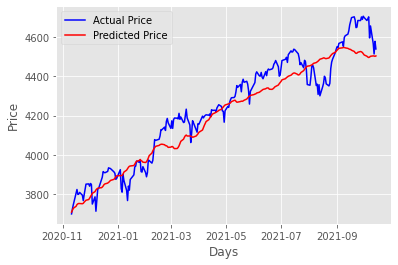

In [889]:
# plot true/pred prices graph
plot_graph(final_df)

In [890]:
final_df.head(10)

,open,high,low,close,adjclose,volume,ticker,ma7,ma21,ma100,...,12ema,MACD,ema,momentum,body,body_abs,close_35,true_close_35,buy_profit,sell_profit
2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000,^GSPC,3500.168527,3434.974749,3339.201604,...,3471.200233,33.701984,3562.251938,3571.659912,9.439941,9.439941,3709.967285,3700.649902,127.989990,0.0
2020-11-12,3562.669922,3569.020020,3518.580078,3537.010010,3537.010010,4890120000,^GSPC,3524.147112,3437.276658,3343.258804,...,3481.324814,36.455323,3545.423986,3536.010010,-25.659912,25.659912,3720.338867,3726.860107,189.850098,0.0
2020-11-13,3552.570068,3593.659912,3552.570068,3585.149902,3585.149902,4709670000,^GSPC,3544.391392,3442.124744,3348.607002,...,3497.297905,42.037272,3571.907930,3584.149902,32.579834,32.579834,3729.423584,3748.139893,162.989990,0.0
2020-11-16,3600.159912,3628.510010,3600.159912,3626.909912,3626.909912,5281980000,^GSPC,3561.028530,3448.939023,3354.038501,...,3517.238214,49.262820,3608.575918,3625.909912,26.750000,26.750000,3739.258789,3803.790039,176.880127,0.0
2020-11-17,3610.310059,3623.110107,3588.679932,3609.530029,3609.530029,4799570000,^GSPC,3575.327114,3457.634742,3360.043301,...,3531.436954,52.976032,3609.211992,3608.530029,-0.780029,0.780029,3747.995361,3824.679932,215.149902,0.0
2020-11-18,3612.090088,3619.090088,3567.330078,3567.790039,3567.790039,5274450000,^GSPC,3577.797119,3463.571405,3365.188801,...,3537.029737,51.951843,3581.597357,3566.790039,-44.300049,44.300049,3751.927246,3799.610107,231.820068,0.0
2020-11-19,3559.409912,3585.219971,3543.840088,3581.870117,3581.870117,4347200000,^GSPC,3582.988560,3470.538551,3370.004602,...,3543.928257,51.680568,3581.779197,3580.870117,22.460205,22.460205,3753.699219,3801.189941,219.319824,0.0
2020-11-20,3579.310059,3581.229980,3556.850098,3557.540039,3557.540039,4218970000,^GSPC,3580.828578,3475.493315,3374.421401,...,3546.022377,48.938218,3565.619758,3556.540039,-21.770020,21.770020,3753.504639,3809.840088,252.300049,0.0
2020-11-23,3566.820068,3589.810059,3552.770020,3577.590088,3577.590088,5036290000,^GSPC,3586.625732,3480.836182,3378.897202,...,3550.878948,47.831387,3573.599978,3576.590088,10.770020,10.770020,3752.406738,3795.540039,217.949951,0.0
2020-11-24,3594.520020,3642.310059,3594.520020,3635.409912,3635.409912,6267570000,^GSPC,3593.805734,3491.999988,3383.454102,...,3563.883712,51.031532,3614.806601,3634.409912,40.889893,40.889893,3754.453125,3768.250000,132.840088,0.0


In [891]:
# final_df.tail(10)

In [892]:
# save the final dataframe to csv-results folder
# csv_filename = os.path.join("test_results", model_name + ".csv")
final_df.to_csv(os.path.join(new_results + "/test-results", model_name + ".csv"))
# xls_filename = os.path.join("test_results", model_name + ".xlsx")
final_df.to_excel(os.path.join(new_results + "/test-results", model_name + ".xlsx"))

In [893]:
candles = final_df
import datetime
candles.rename(columns={f'close_{LOOKUP_STEP}':'predict',f'true_close_{LOOKUP_STEP}':'test'}, inplace=True)

In [894]:
i = 0
poz = 0
trade = "" 
profit = 0
year = ''
# typeTrade = 'long'
# typeTrade = 'short'
typeTrade = 'short_long'




profit_y = pd.DataFrame
for index, row in final_df.iterrows():
    i = i + 1
    
    if i == 1:
        openPrice = row['close']
        
    closePrice = row['close']
    
    if (typeTrade == 'long' or typeTrade == 'short_long') and poz == 0 and row['close'] < row['predict']:
        poz = row['close']
        trade = "long"
        print(index.strftime("%Y/%m/%d"), trade, round(poz))
        year =  index.year
        continue
    
    if (typeTrade == 'short' or typeTrade == 'short_long') and poz == 0 and row['close'] > row['predict']:
        poz = row['close']
        trade = "short"
        print(index.strftime("%Y/%m/%d"), trade, round(poz))
        year =  index.year
        continue    
    
    if  (typeTrade == 'long'  or typeTrade == 'short_long') and trade == 'long' and row['close'] > row['predict']:
        trade = "short"
        profit = profit + row['close'] - poz
#         print(index.strftime("%Y/%m/%d"), trade, round(row['close']) , "Profit:", round(row['close'] - poz))
        if typeTrade == 'short_long':            
            print(index.strftime("%Y/%m/%d"), trade, round(row['close']) , "Profit:", round(row['close'] - poz))
            poz = row['close']
        if typeTrade == 'long':
            print(index.strftime("%Y/%m/%d"), 'Close', round(row['close']) , "Profit:", round(row['close'] - poz))
            poz = 0
        continue  
        
        
    if  (typeTrade == 'short' or typeTrade == 'short_long') and trade == 'short' and row['close'] < row['predict']:
        trade = "long"
        profit = profit + poz - row['close']
        
#         poz = row['close']
        if (typeTrade == 'short_long'):            
            print(index.strftime("%Y/%m/%d"), trade, round(row['close']) , "Profit:", round(poz - row['close']))
            poz = row['close']
        if typeTrade == 'short':            
            print(index.strftime("%Y/%m/%d"), 'Close', round(row['close']) , "Profit:", round(poz - row['close']))
            poz = 0
        continue  
        
#     if trade == 'long' and row['close'] > row['predict']:
#         trade = "short"
#         profit = profit + row['close'] - poz
#         print(index.strftime("%Y/%m/%d"), trade, round(row['close']) , "Profit:", round(row['close'] - poz))
#         #poz = row['close']
#         if (typeTrade == 'short' or typeTrade == 'short_long'):
#             poz = row['close']
#         else:
#             poz = 0
#             trade = "short"
#         continue  
            
                
    
    
#     if year != index.year:
#         profit_y.year = profit
        
    

print()

if trade == 'long' :
    profit = profit + closePrice - poz

if trade == 'short':
    profit = profit + poz - closePrice

print(index.strftime("%Y/%m/%d"), round(poz) , round(closePrice), " -=-=-= Close",trade)       
print()
print('Trade:',trade,'Poz:',round(poz))        
print('Profit:', round(profit),round(profit/openPrice*100),"%")   

# pprofit_y
# for py in profit_y:
#     print(py)

print(i)

2020/11/11 long 3573
2021/08/30 short 4529 Profit: 956
2021/08/31 long 4523 Profit: 6

2021/10/14 4523 4438  -=-=-= Close long

Trade: long Poz: 4523
Profit: 878 25 %
233


In [895]:
# Рисует основной график
def draw_candles(candles):
    # Добавим на график несколько ЕМА-средних
    # candles['ema100'] = pd.Series.ewm(candles['close'], span=100).mean()
    # candles['ema50'] = pd.Series.ewm(candles['close'], span=50).mean()
    # candles['ema20'] = pd.Series.ewm(candles['close'], span=20).mean()
    # candles['26ema'] = pd.Series.ewm(candles['close'], span=26).mean()
    # candles['12ema'] = pd.Series.ewm(candles['close'], span=12).mean()
    # candles['MACD'] = (candles['12ema']-candles['26ema'])
    plt.style.use('ggplot')  # 'seaborn-paper'
    # Отображаем график по цене закрытия свечей и ЕМА-шки
    fig = candles.plot(y=['test', 'predict','close'], figsize=(25, 16))
    # Добавляем заголовок
    fig.set_title('График ' + ticker)
    # Рисуем шкалу с датами
    PlotDatesX(fig, candles)

# Определяет начальную и конечную позицию Х (по индексу свечей) для заданной даты. Пригодится при отрисовке ценовых уровней
def DateX(date, candles):
    # Цикл по датам в свечах, результат - список X-координат, соответствующих заданной дате
    xpositions = [index for index, row in candles.iterrows() if row['date'].date() == date]
    # Возвращает список - пару начальная координата Х и конечная координата Х для заданной даты на графике
    if xpositions == []:
        return [len(candles) - 1, len(candles)]  # На случай если за текущую дату нет еще свечей
    return [xpositions[0], xpositions[-1]]


# Рисует метки дат на оси Х
def PlotDatesX(fig, candles):
    # Составляем список дат (только уникальные даты) из столбца DT. Они будут метками на оси Х. Сортировка по датам
    # обязательна, т.к. при создании множества(set) даже из отсортированного списка, множество может не сохранить порядок списка
    dates = sorted(set(map(lambda dt: datetime.date(dt), candles['date'])))
    # Создаем список координат Х для каждой метки (даты). Нам нужна только первая позиция - [0].
    xlabel = [DateX(d, candles)[0] for d in dates]
    # Рисуем ось Х, разделенную по датам
    fig.set_xticklabels(dates)
    fig.set_xticks(xlabel)
    return dates, xlabel

In [896]:
if collab:
    copy_tree(new_results + "/results", data_path + "/results" )
    copy_tree(new_results + "/logs", data_path + "/logs")
    copy_tree(new_results + "/data", data_path + "/data")
    copy_tree(new_results + "/test-results", data_path + "/test-results")
# Arc folders with results
shutil.make_archive(new_results, 'zip', new_results)

'D:\\Temp\\Sem\\NewProject\\2000_test2021_ema100_ep300.zip'

KeyError: 'date'

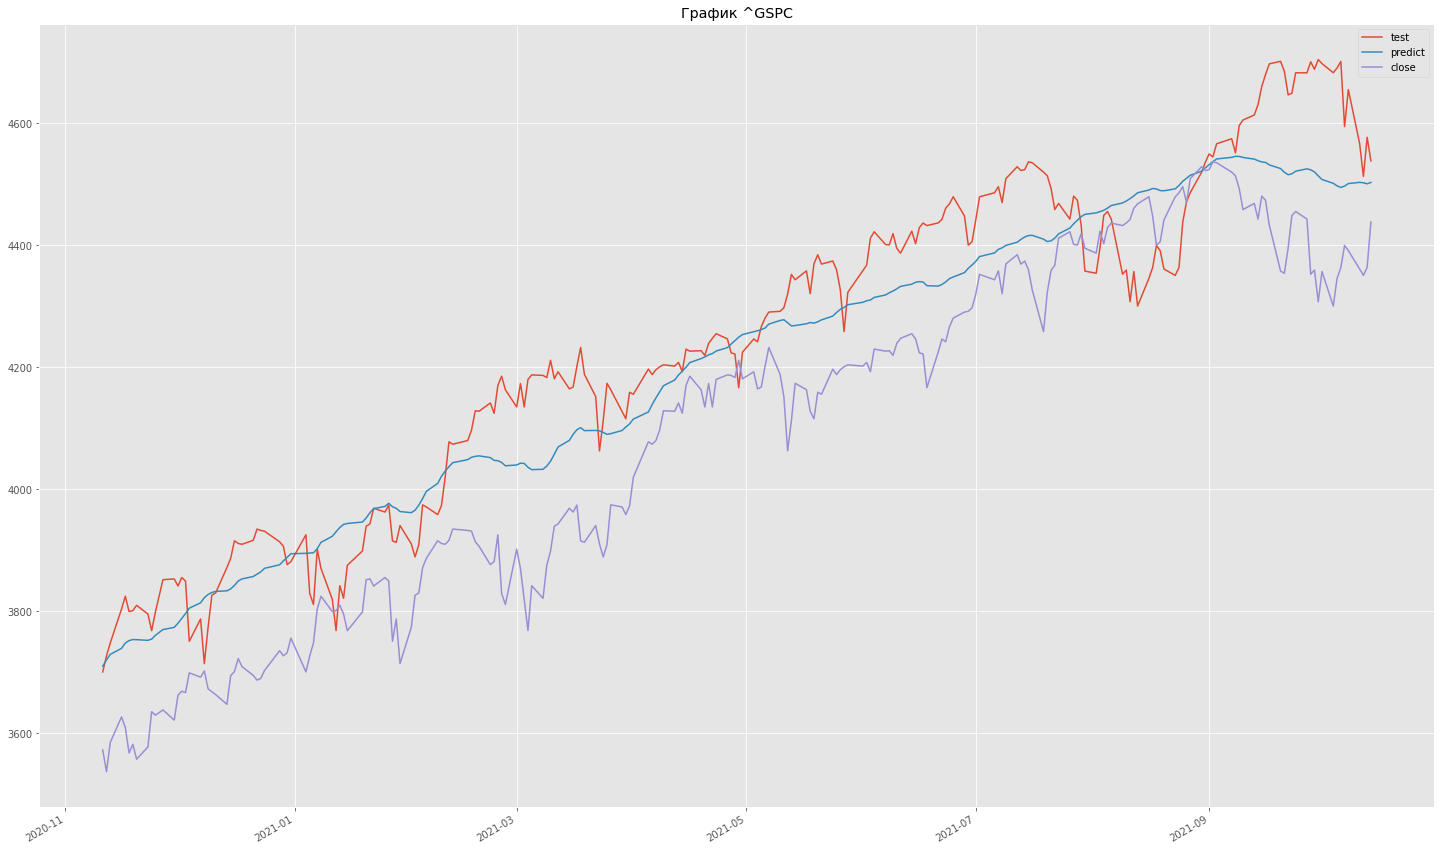

In [897]:
draw_candles(candles.tail(1000))